## What will you learn from this project?
* EDA (Exploratory Data Analysis)
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.
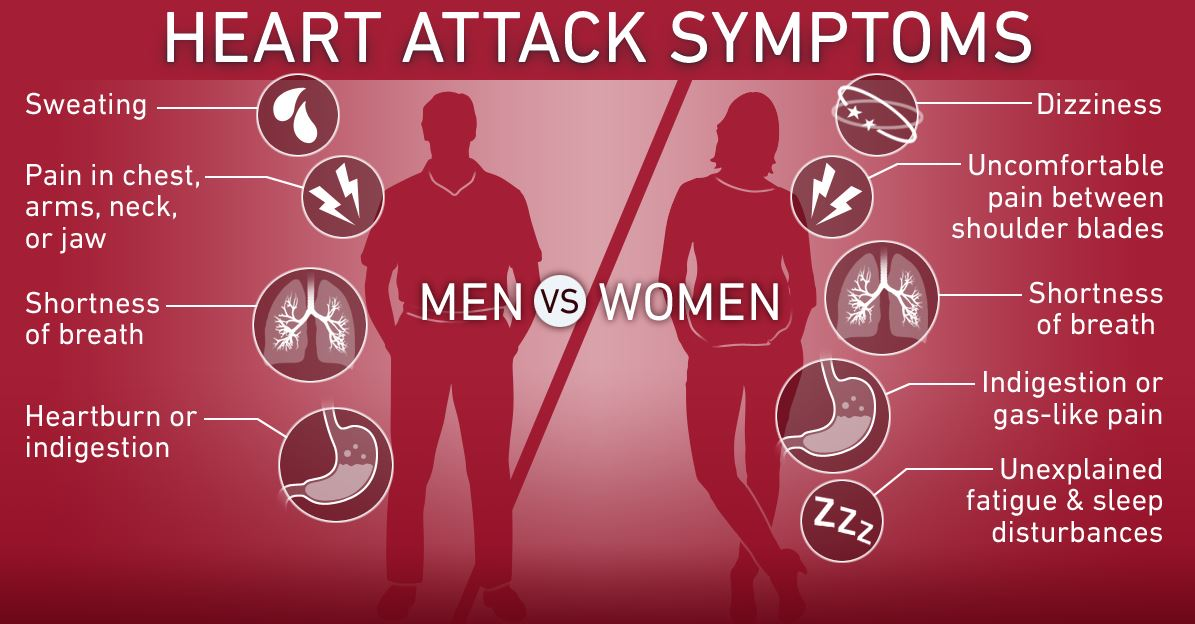

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve
# import warnings
# warnings.filterwarnings("ignore")

## 0) Data Content
1. **Age:** Age of the patient <span style="color:red"><span style="color:yellow"> => </span> Yaş </span>
1. **Sex:** Sex of the patient (1 = male; 0 = female) <span style="color:red"><span style="color:yellow"> => </span> Cinsiyet</span>
1. **cp:** Chest Pain type chest pain type  <span style="color:red"><span style="color:yellow"> => </span>göğüs ağrısı türü</span>
    * 0 = asymptomatic;  <span style="color:red"><span style="color:yellow"> => </span>hiçbir semptom göstermemesi</span>
    * 1 = typical angina; 
    * 2 = atypical angina; 
    * 3 = non-anginal pain;
1. **trtbps:** resting blood pressure (in mm Hg)  <span style="color:red"><span style="color:yellow"> => </span> dinlenirken ölçülen kan basıncı</span>
1. **chol:** cholestoral in mg/dl fetched via BMI sensor  <span style="color:red"><span style="color:yellow"> => </span> BMI sensörü ile ölçülen kolesterol</span>
1. **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  <span style="color:red"><span style="color:yellow"> => </span> açken ölçülen kan şekeri</span>
1. **rest_ecg:** resting electrocardiographic results  <span style="color:red"><span style="color:yellow"> => </span> dinlenirken ölçülen ekg sonuçları</span>
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
1. **thalachh:** maximum heart rate achieved  <span style="color:red"><span style="color:yellow"> => </span> ulaşılan maksimum kalp atış hızı</span>
1. **exng:** exercise induced angina (1 = yes; 0 = no) <span style="color:red"><span style="color:yellow"> => </span> egzersize bağlı göğüs ağrısı</span>
1. **oldpeak :** ST depression induced by exercise relative to rest <span style="color:red"><span style="color:yellow"> => </span>dinlenmeye göre egzersizin neden olduğu ST depresyonu </span>
1. **slp** the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) <span style="color:red"><span style="color:yellow"> => </span> egzersiz testinde ST segementi eğimi</span>
1. **caa:** number of major vessels (0-3) <span style="color:red"><span style="color:yellow"> => </span> büyük damar sayısı</span>
1. **thall**: 2 = normal; 1 = fixed defect; 3 = reversable defect
1. **target:** 0= less chance of heart attack 1= more chance of heart attack  <span style="color:red"><span style="color:yellow"> => </span> 0 = daha az kalp krizi geçirme olasılığı, 1 = daha fazla kalp krizi geçirme olasılığı</span> 

## 1) Read and Analyse Data

In [3]:
df = pd.read_csv("data/heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
# describe basic statistics of data
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Preprocessing
## 2) Missing Value Analysis

In [7]:
df.isna().sum() # nan(null) değer olsaydı mean değeri nan'lara atayabilirdik.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## 3) Unique Value Analysis

In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
df["sex"].value_counts().shape

(2,)

In [15]:
df["sex"].value_counts().shape[0]

2

In [17]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0])) # 41 farklı  yaş değeri, 2 farklı cinsiyet değeri vs var. Kimisi numeric, kimisi caterogical

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


## i) Categorical Feature Analysis

### Note
Categorical verilerde genelde binary ya da 3-4 sınıf olduğu için **countplot**da gösterim için idealdir.

In [18]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

### Featurelar'ın outputa etkisi nedir?

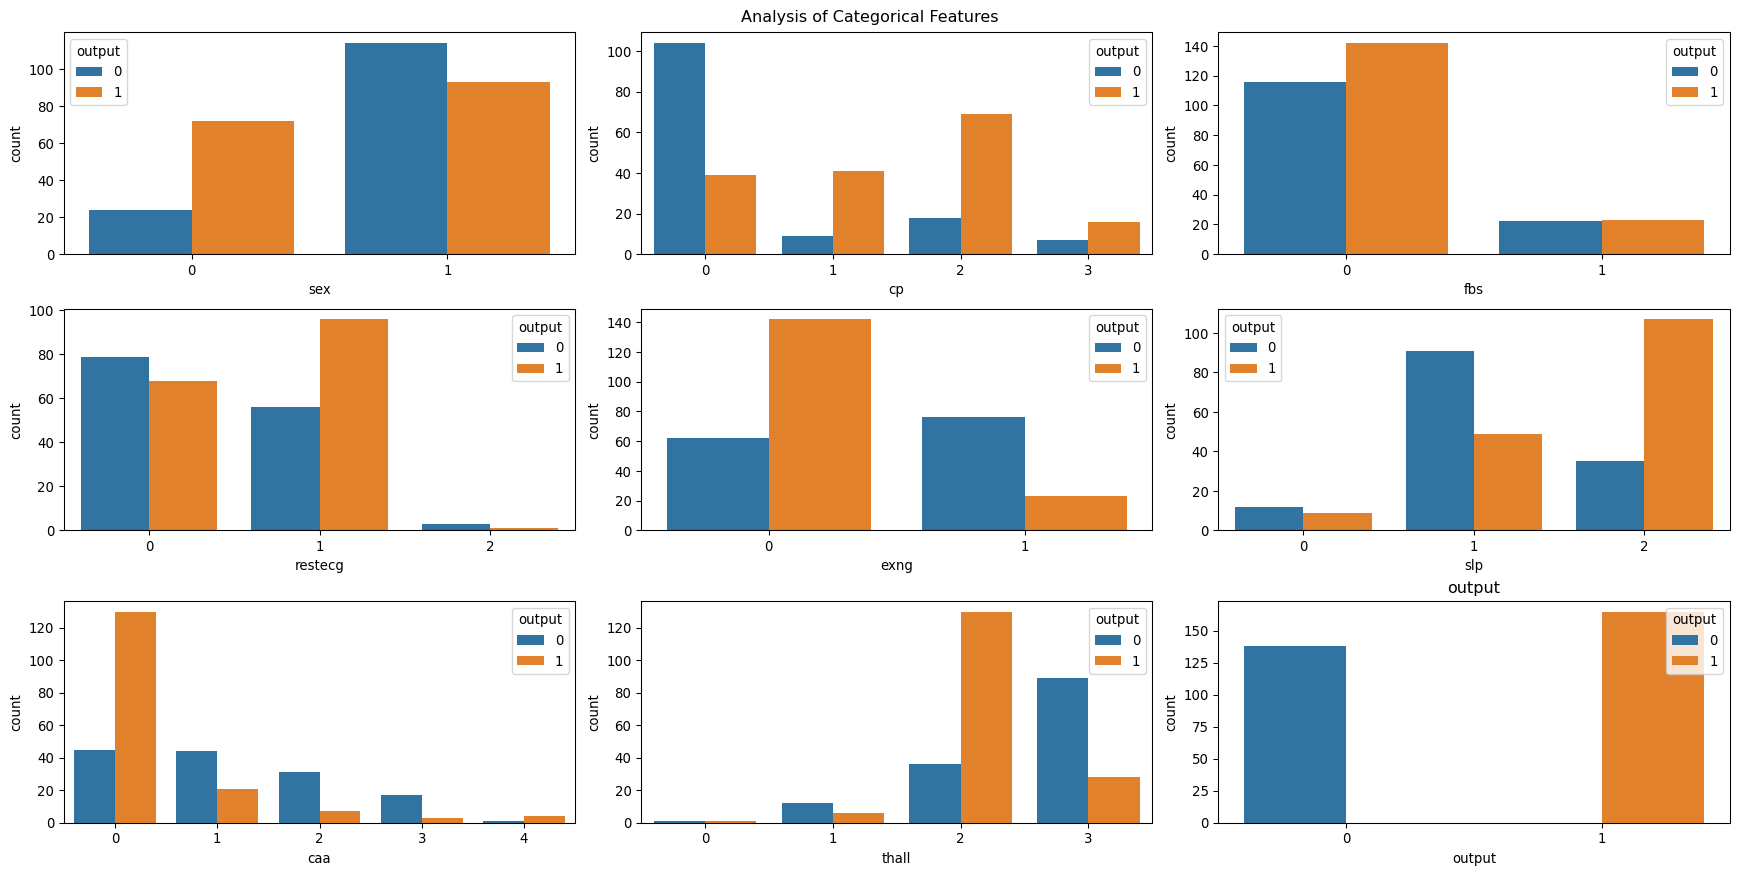

In [33]:
fig, axs = plt.subplots(3, 3, constrained_layout = True,figsize=(18,9), dpi=96) 
fig.suptitle('Analysis of Categorical Features')
x, y = 0, 0

df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    sns.countplot(x = i, data = df_categoric, hue = "output", ax=axs[x][y]) # hue="output" => featurelar outputa göre karşılaştırır.
    plt.title(i)
    if(y==2): # son sütuna geldiğinde bir alt satıra geçsin ve y'yi başlangıç sütununa getirsin.
        x += 1
        y = -1
    y += 1
plt.show()

Yukarıdaki plota göre
1. **Sex = 0** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> 
2. **cp = 0 hariç** aldığı diğer tüm değerlerde <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> Eğer **cp = 0** ise bireylerin <span style="color:#0066ff"> kalp krizi olma olasılığı düşük </span>
3. **fbs** de çok fazla bir ayrım yapılamamaktadır.
4. **restecg = 1** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span>
5. **exng = 0** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> Eğer **exng = 1** ise bireylerin <span style="color:#0066ff"> kalp krizi olma olasılığı düşük </span>
6. **slp = 2** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> Eğer **slp = 1** ise bireylerin <span style="color:#0066ff"> kalp krizi olma olasılığı düşük </span>
6. **caa = 0** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> Eğer **caa = 1, 2 ya da 3** ise bireylerin <span style="color:#0066ff"> kalp krizi olma olasılığı düşük </span>
6. **thall = 2** olan bireylerin <span style="color:red"> kalp krizi olma olasılığı yüksek. </span> **thall = 3** ise bireylerin <span style="color:#0066ff"> kalp krizi olma olasılığı düşük. </span>
7. **output = 1** olan bireyler verisetinde daha fazla

## ii) Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [34]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"] # output numeric değil ancak diğer verileri görselleştirmek için kullanacağız.

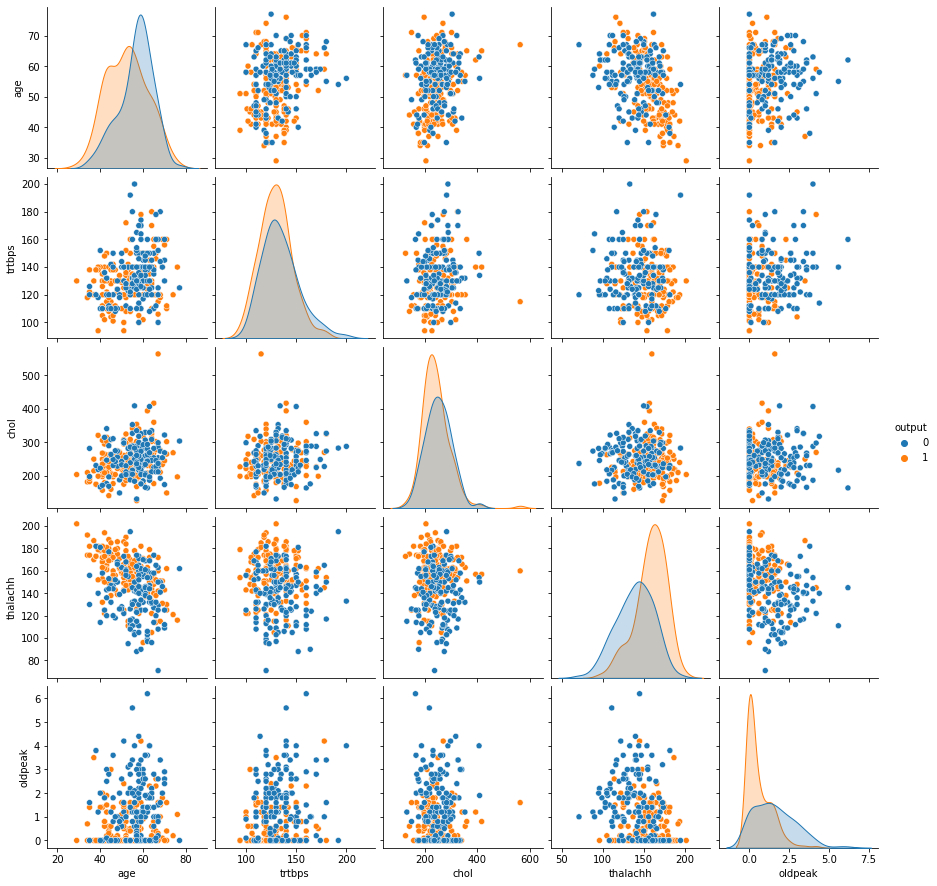

In [35]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

## 4-Standardization
### Note
Standardization işlemi numeric sayılar için yapılır.

In [36]:
scaler = StandardScaler()
scaler

StandardScaler()

In [37]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]]) # outputu almıyoruz.(-1)
scaled_array 

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [ ]:
# pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

In [ ]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

In [ ]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

In [ ]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

In [ ]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

In [ ]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

<a id="12"></a>
## Correlation Analysis

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.
* 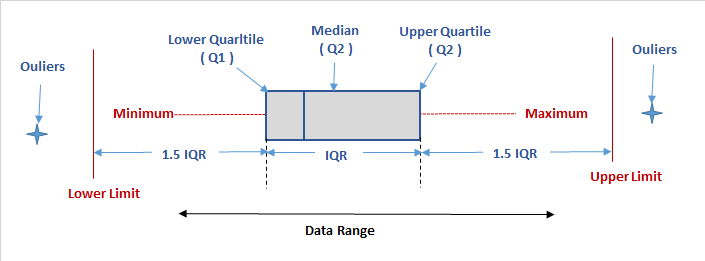

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

In [ ]:
df.describe()

In [ ]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

<a id="14"></a>
## Modelling

In [ ]:
df1 = df.copy()

### Encoding Categorical Columns
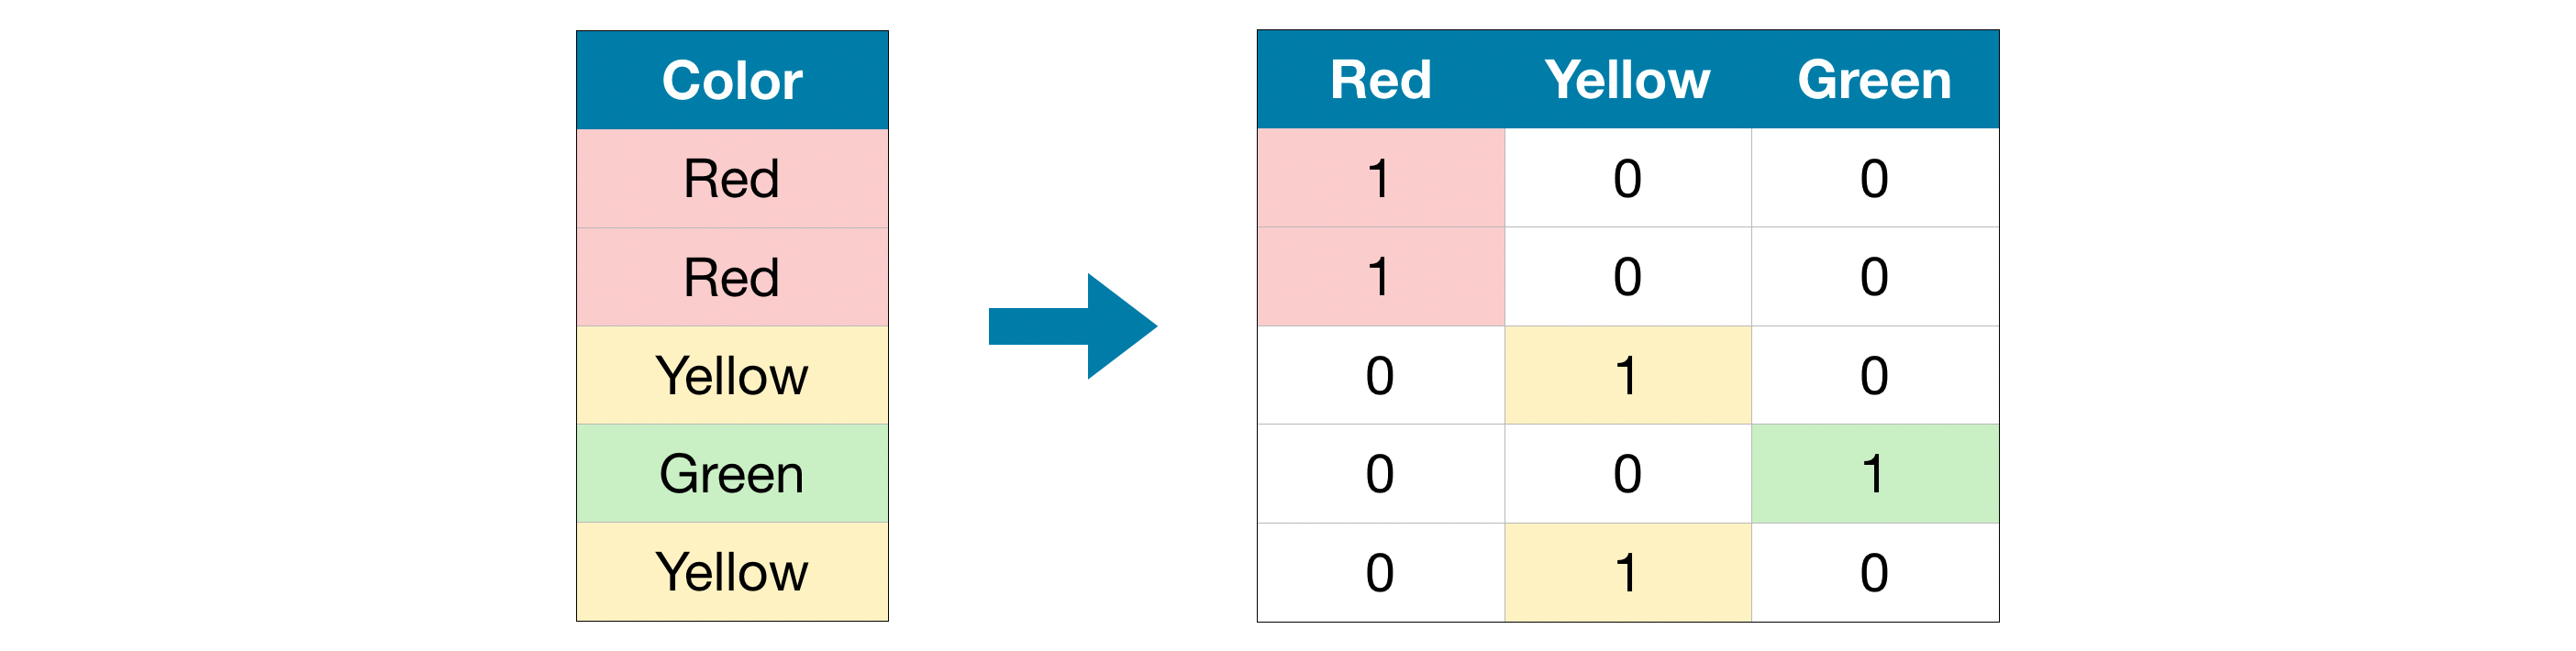

In [ ]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

In [ ]:
# 
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

### Scaling

In [ ]:
scaler = StandardScaler()
scaler

In [ ]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

### Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

### Logistic Regression 

In [ ]:
logreg = LogisticRegression()
logreg

In [ ]:
# fitting = training
logreg.fit(X_train, y_train)

In [ ]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

In [ ]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

In [ ]:
#dummy_ = pd.DataFrame(y_pred_prob)
#dummy_["y_pred"] = y_pred
#dummy_.head()

In [ ]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

##### ROC Curve 
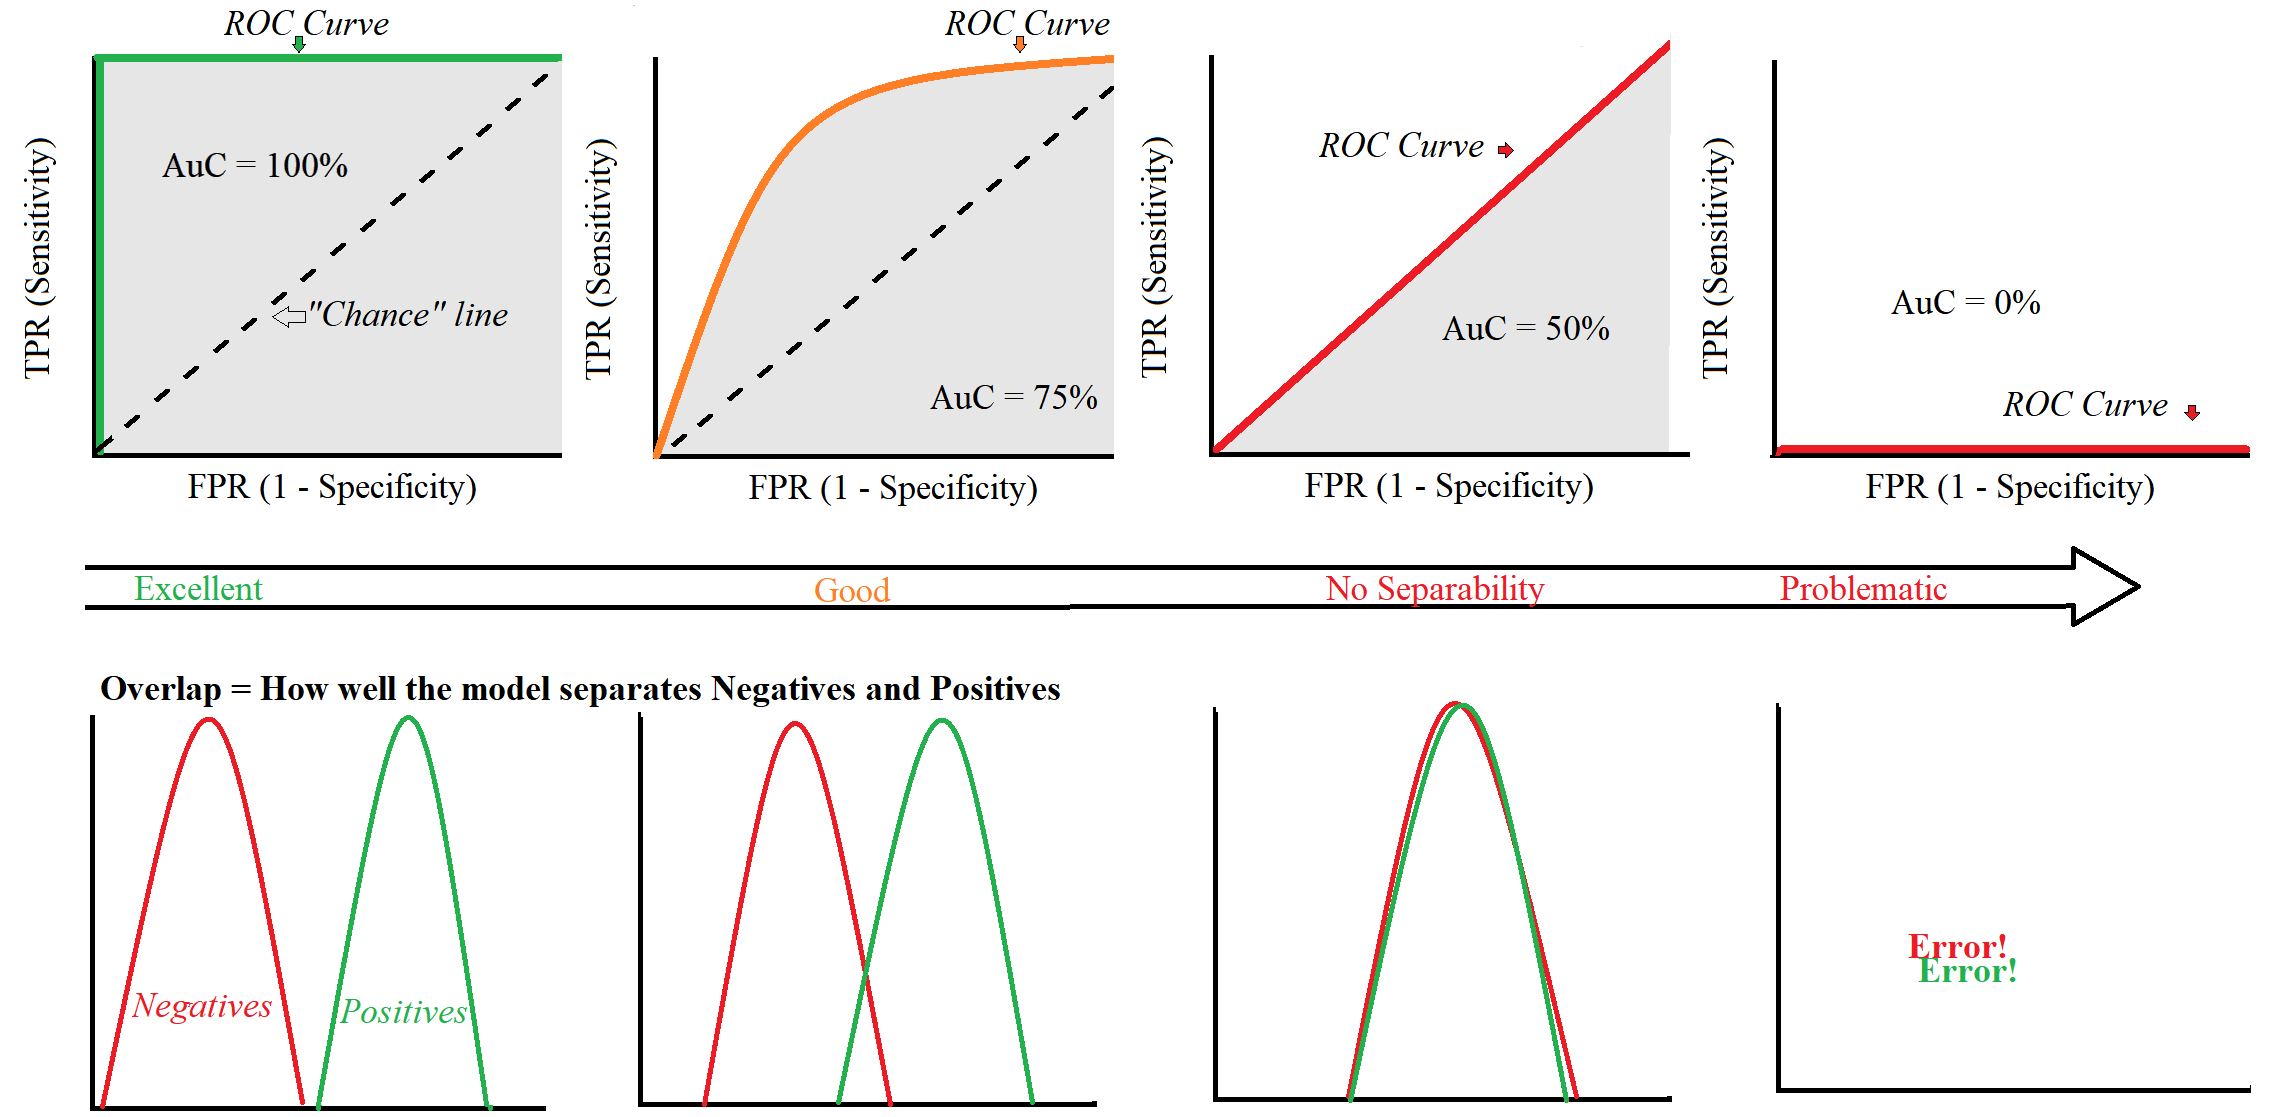

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [ ]:
lr = LogisticRegression()
lr

In [ ]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [ ]:
lr_searcher = GridSearchCV(lr, parameters)

In [ ]:
lr_searcher.fit(X_train, y_train)

In [ ]:
print("Best parameters: ",lr_searcher.best_params_)

In [ ]:
y_pred = lr_searcher.predict(X_test)

In [ ]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

<a id="15"></a>
## Conclusion
* Lets make a practise now!
* You can make different analyzes to reinforce what you have learned.